In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree

In [2]:
in_file_name = 'data/runs_ju.tsv'
runs = pd.read_csv(in_file_name, delimiter="\t")
runs = runs.assign(leg_id=runs.leg_nro.astype(str))

In [3]:
runs

name  year  team_id               team    pace  \
0              joni hirvikallio  2018        2             KOOVEE   5.873   
1              joni hirvikallio  2017       16             KOOVEE   5.762   
2              joni hirvikallio  2016      143             KOOVEE   6.251   
3              joni hirvikallio  2015       12             KOOVEE   5.843   
4              joni hirvikallio  2013       37             KOOVEE   5.796   
5                   topi anjala  2018        2             KOOVEE   5.882   
6                   topi anjala  2017        1             KOOVEE   5.621   
7                   topi anjala  2016        9             KOOVEE   6.100   
8                   topi anjala  2015       12             KOOVEE   5.977   
9                   topi anjala  2014       21             KOOVEE   7.164   
10                  topi anjala  2013       37             KOOVEE   5.642   
11                  topi anjala  2012       48             KOOVEE   5.974   
12                   lauri sild  2018        2             KOOVEE   5.836   
13                   lauri sild  2017        1             KOOVEE   5.851   
14                   lauri sild  2016        9             KOOVEE   5.996   
15                   lauri sild  2015       12             KOOVEE   5.829   
16                   lauri sild  2014        3    HIIDENKIERTÄJÄT   6.765   
17                   lauri sild  2013        4    HIIDENKIERTÄJÄT   5.391   
18                   lauri sild  2012        3              DELTA   5.866   
19             oleksandr kratov  2018        2             KOOVEE   5.703   
20             oleksandr kratov  2015       18           OK ORION   5.940   
21             oleksandr kratov  2014       51           OK ORION   6.563   
22                kenny kivikas  2018        2             KOOVEE   5.603   
23                kenny kivikas  2017        1             KOOVEE   5.662   
24                kenny kivikas  2016      143             KOOVEE   5.837   
25                kenny kivikas  2013       28       KANGASALA SK   6.014   
26                kenny kivikas  2012       18       KANGASALA SK   6.562   
27                    timo sild  2018        2             KOOVEE   5.526   
28                    timo sild  2017        1             KOOVEE   5.272   
29                    timo sild  2016        9             KOOVEE   5.850   
...                         ...   ...      ...                ...     ...   
76515               torbjrn vrp  2012      347           IK GRANE  11.828   
76516              trygve tömte  2012      344          RAUMAR OL   7.265   
76517           sebastian conge  2012      340          SPORTVOGL   8.514   
76518             mats lundberg  2012      295     DALAPORTENS OL   8.396   
76519            miikka huovila  2012      275              DELTA   7.402   
76520            sami takaluoma  2012      246  TAMPEREEN PYRINTÖ  10.126   
76521               antti siren  2012      246  TAMPEREEN PYRINTÖ  12.509   
76522               ondra kazda  2012      215  BROUCCI A BERUSKY   6.535   
76523            oscar carlsson  2012      205          EKSJÖ SOK   6.563   
76524          victor antonsson  2012      205          EKSJÖ SOK   7.591   
76525            denis glazunov  2012      201        RASTIVARSAT   6.799   
76526          anders österlund  2012      194       VÄSTERÅS SOK   6.210   
76527           jonas lindegren  2012      194       VÄSTERÅS SOK   7.952   
76528            filip ivermark  2012      194       VÄSTERÅS SOK   7.796   
76529            erik-a nilsson  2012      191        NORBERGS OK   9.013   
76530              anders wedin  2012      160      SUNDSVALLS OK   7.537   
76531               sara timmer  2012      160      SUNDSVALLS OK  10.224   
76532            jill johansson  2012      160      SUNDSVALLS OK   9.680   
76533               emil åström  2012      160      SUNDSVALLS OK  11.037   
76534           joakim nordling  2012      160      SUNDSVALLS OK   9.109   
76535            hakon 

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

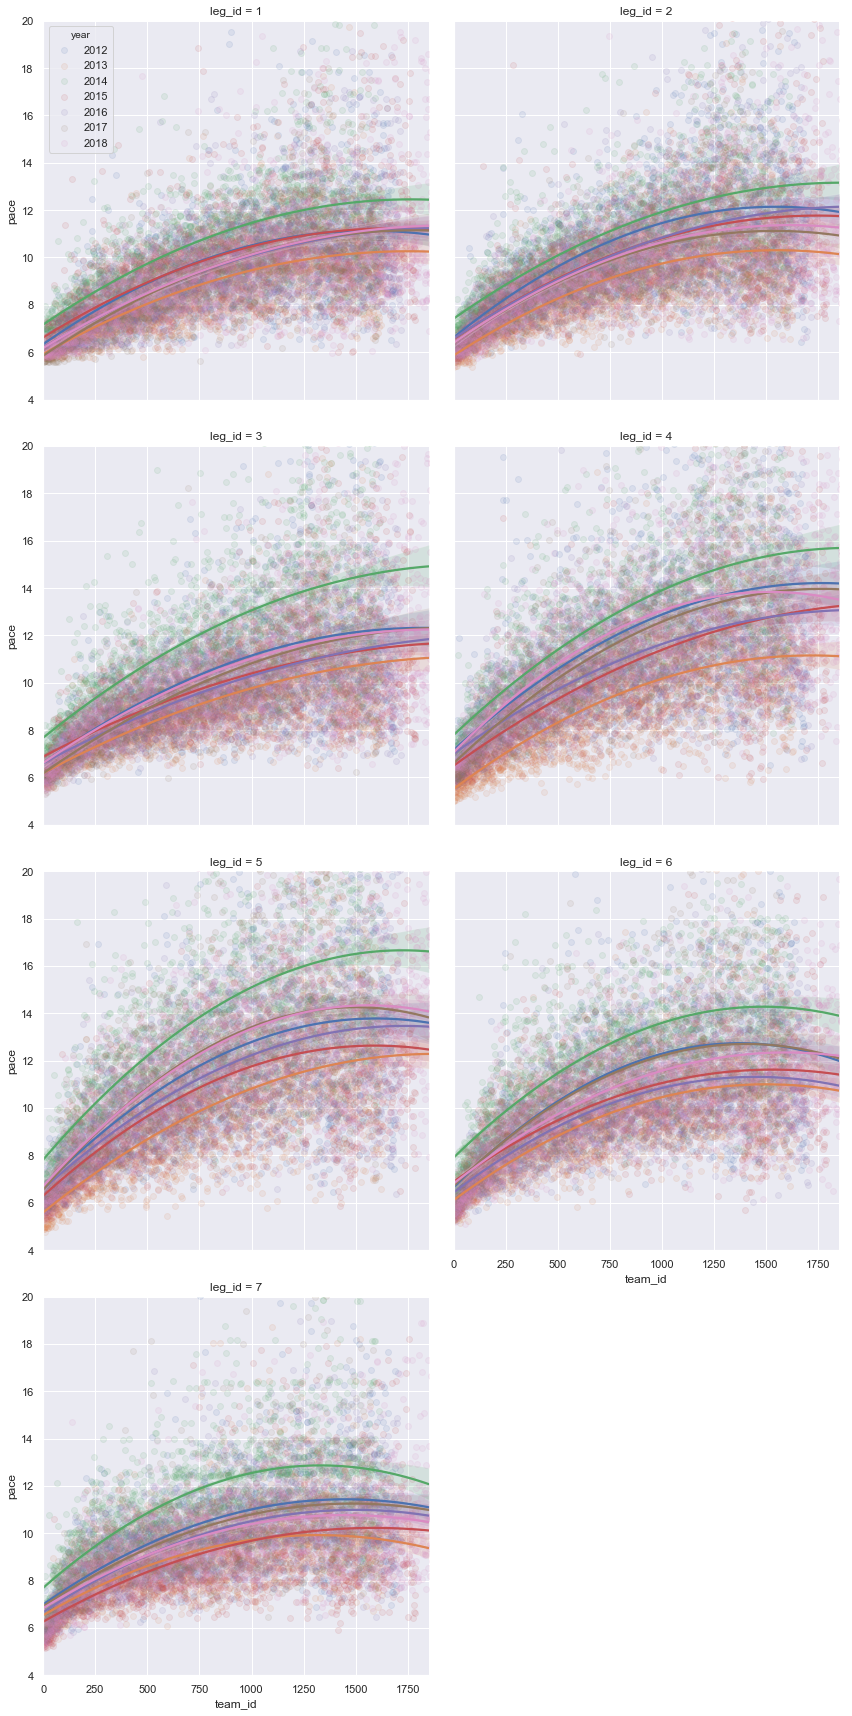

In [51]:
import seaborn as sns
sns.set(rc={})
g = sns.FacetGrid(runs, col="leg_id", hue="year", xlim=(0,1850), ylim=(4,20), height=6, aspect=1, col_wrap=2, legend_out=False)
g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


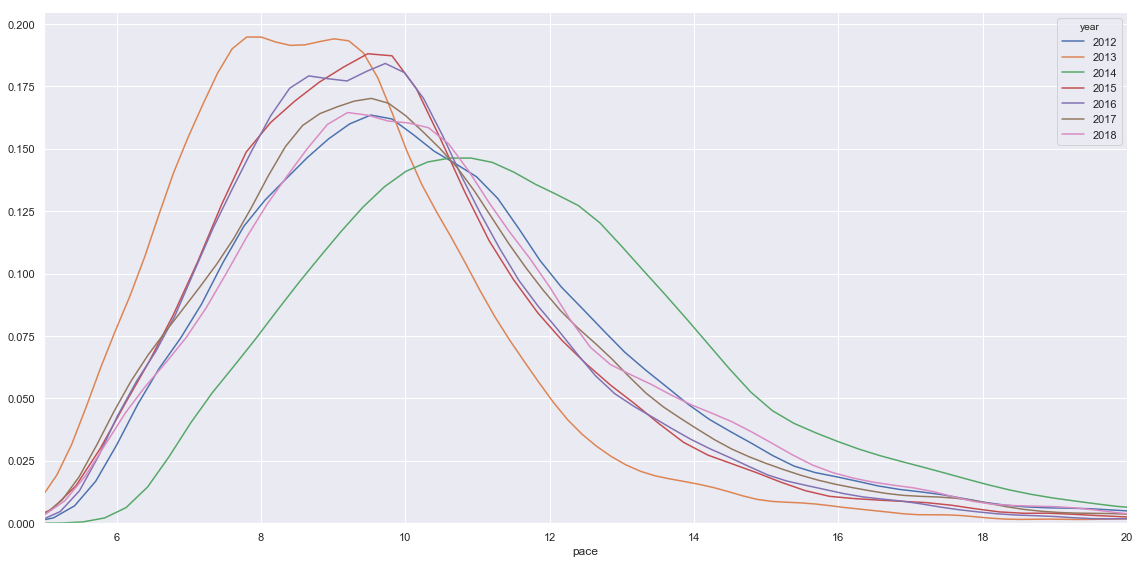

In [6]:
g = sns.FacetGrid(runs, hue="year", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()


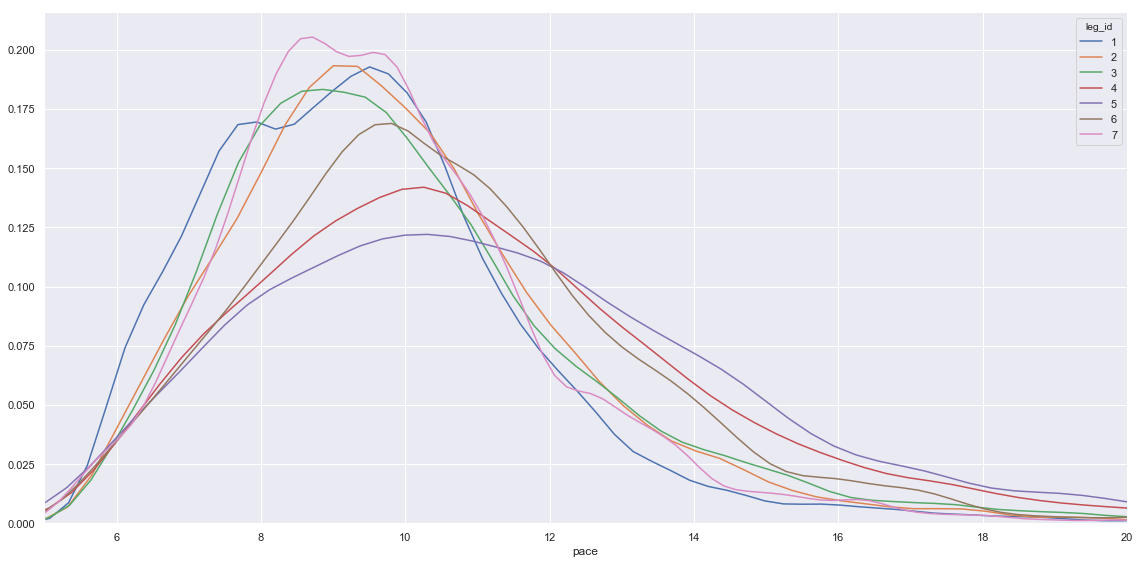

In [7]:
g = sns.FacetGrid(runs, hue="leg_id", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

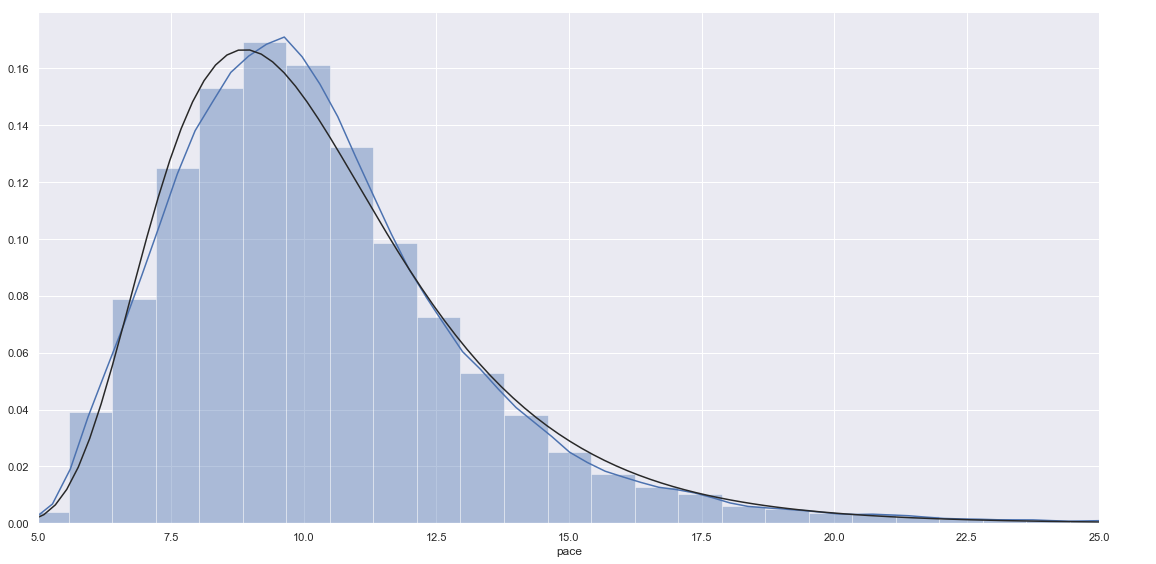

In [8]:
g = sns.FacetGrid(runs, height=8, aspect=2, xlim=(5,25), margin_titles=True) # no facet here
g.map(sns.distplot, "pace", hist=True, fit=lognorm).add_legend()

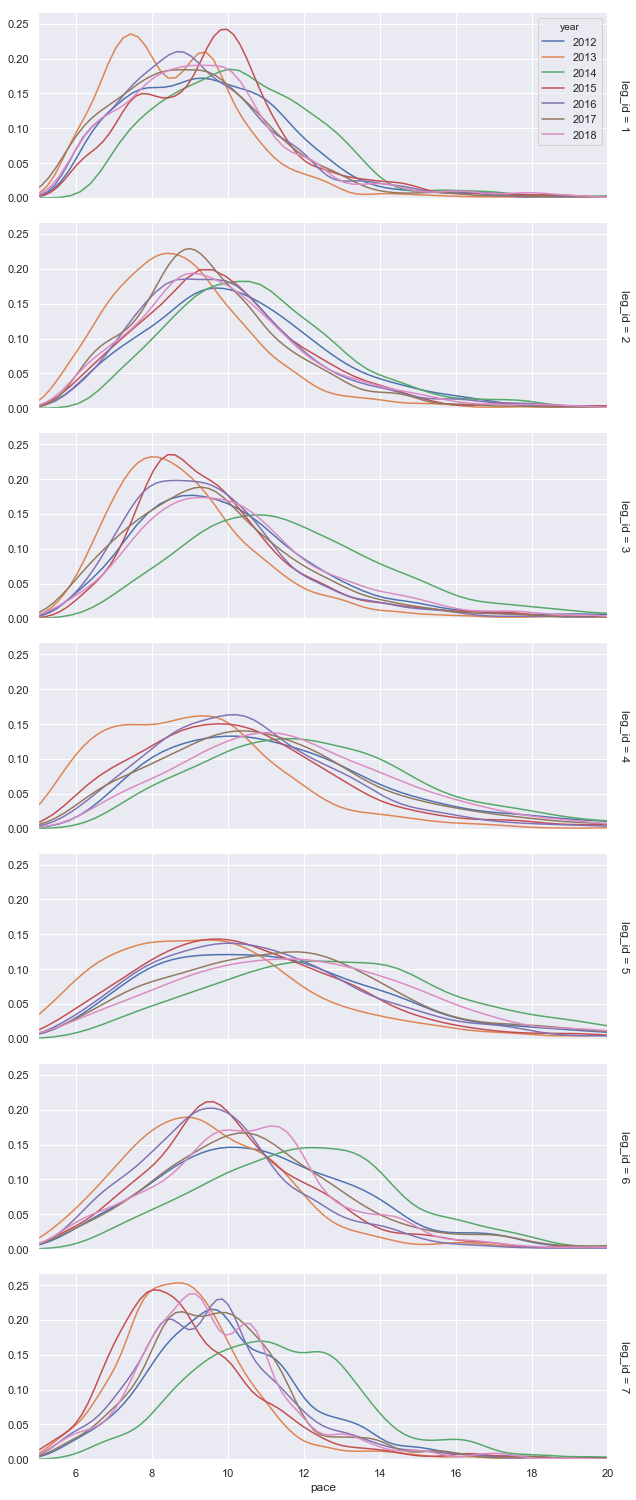

In [9]:
g = sns.FacetGrid(runs, hue="year", row="leg_id",  aspect=3, xlim=(5,20), margin_titles=True, legend_out=False)
g.map(sns.distplot, "pace", hist=False).add_legend()

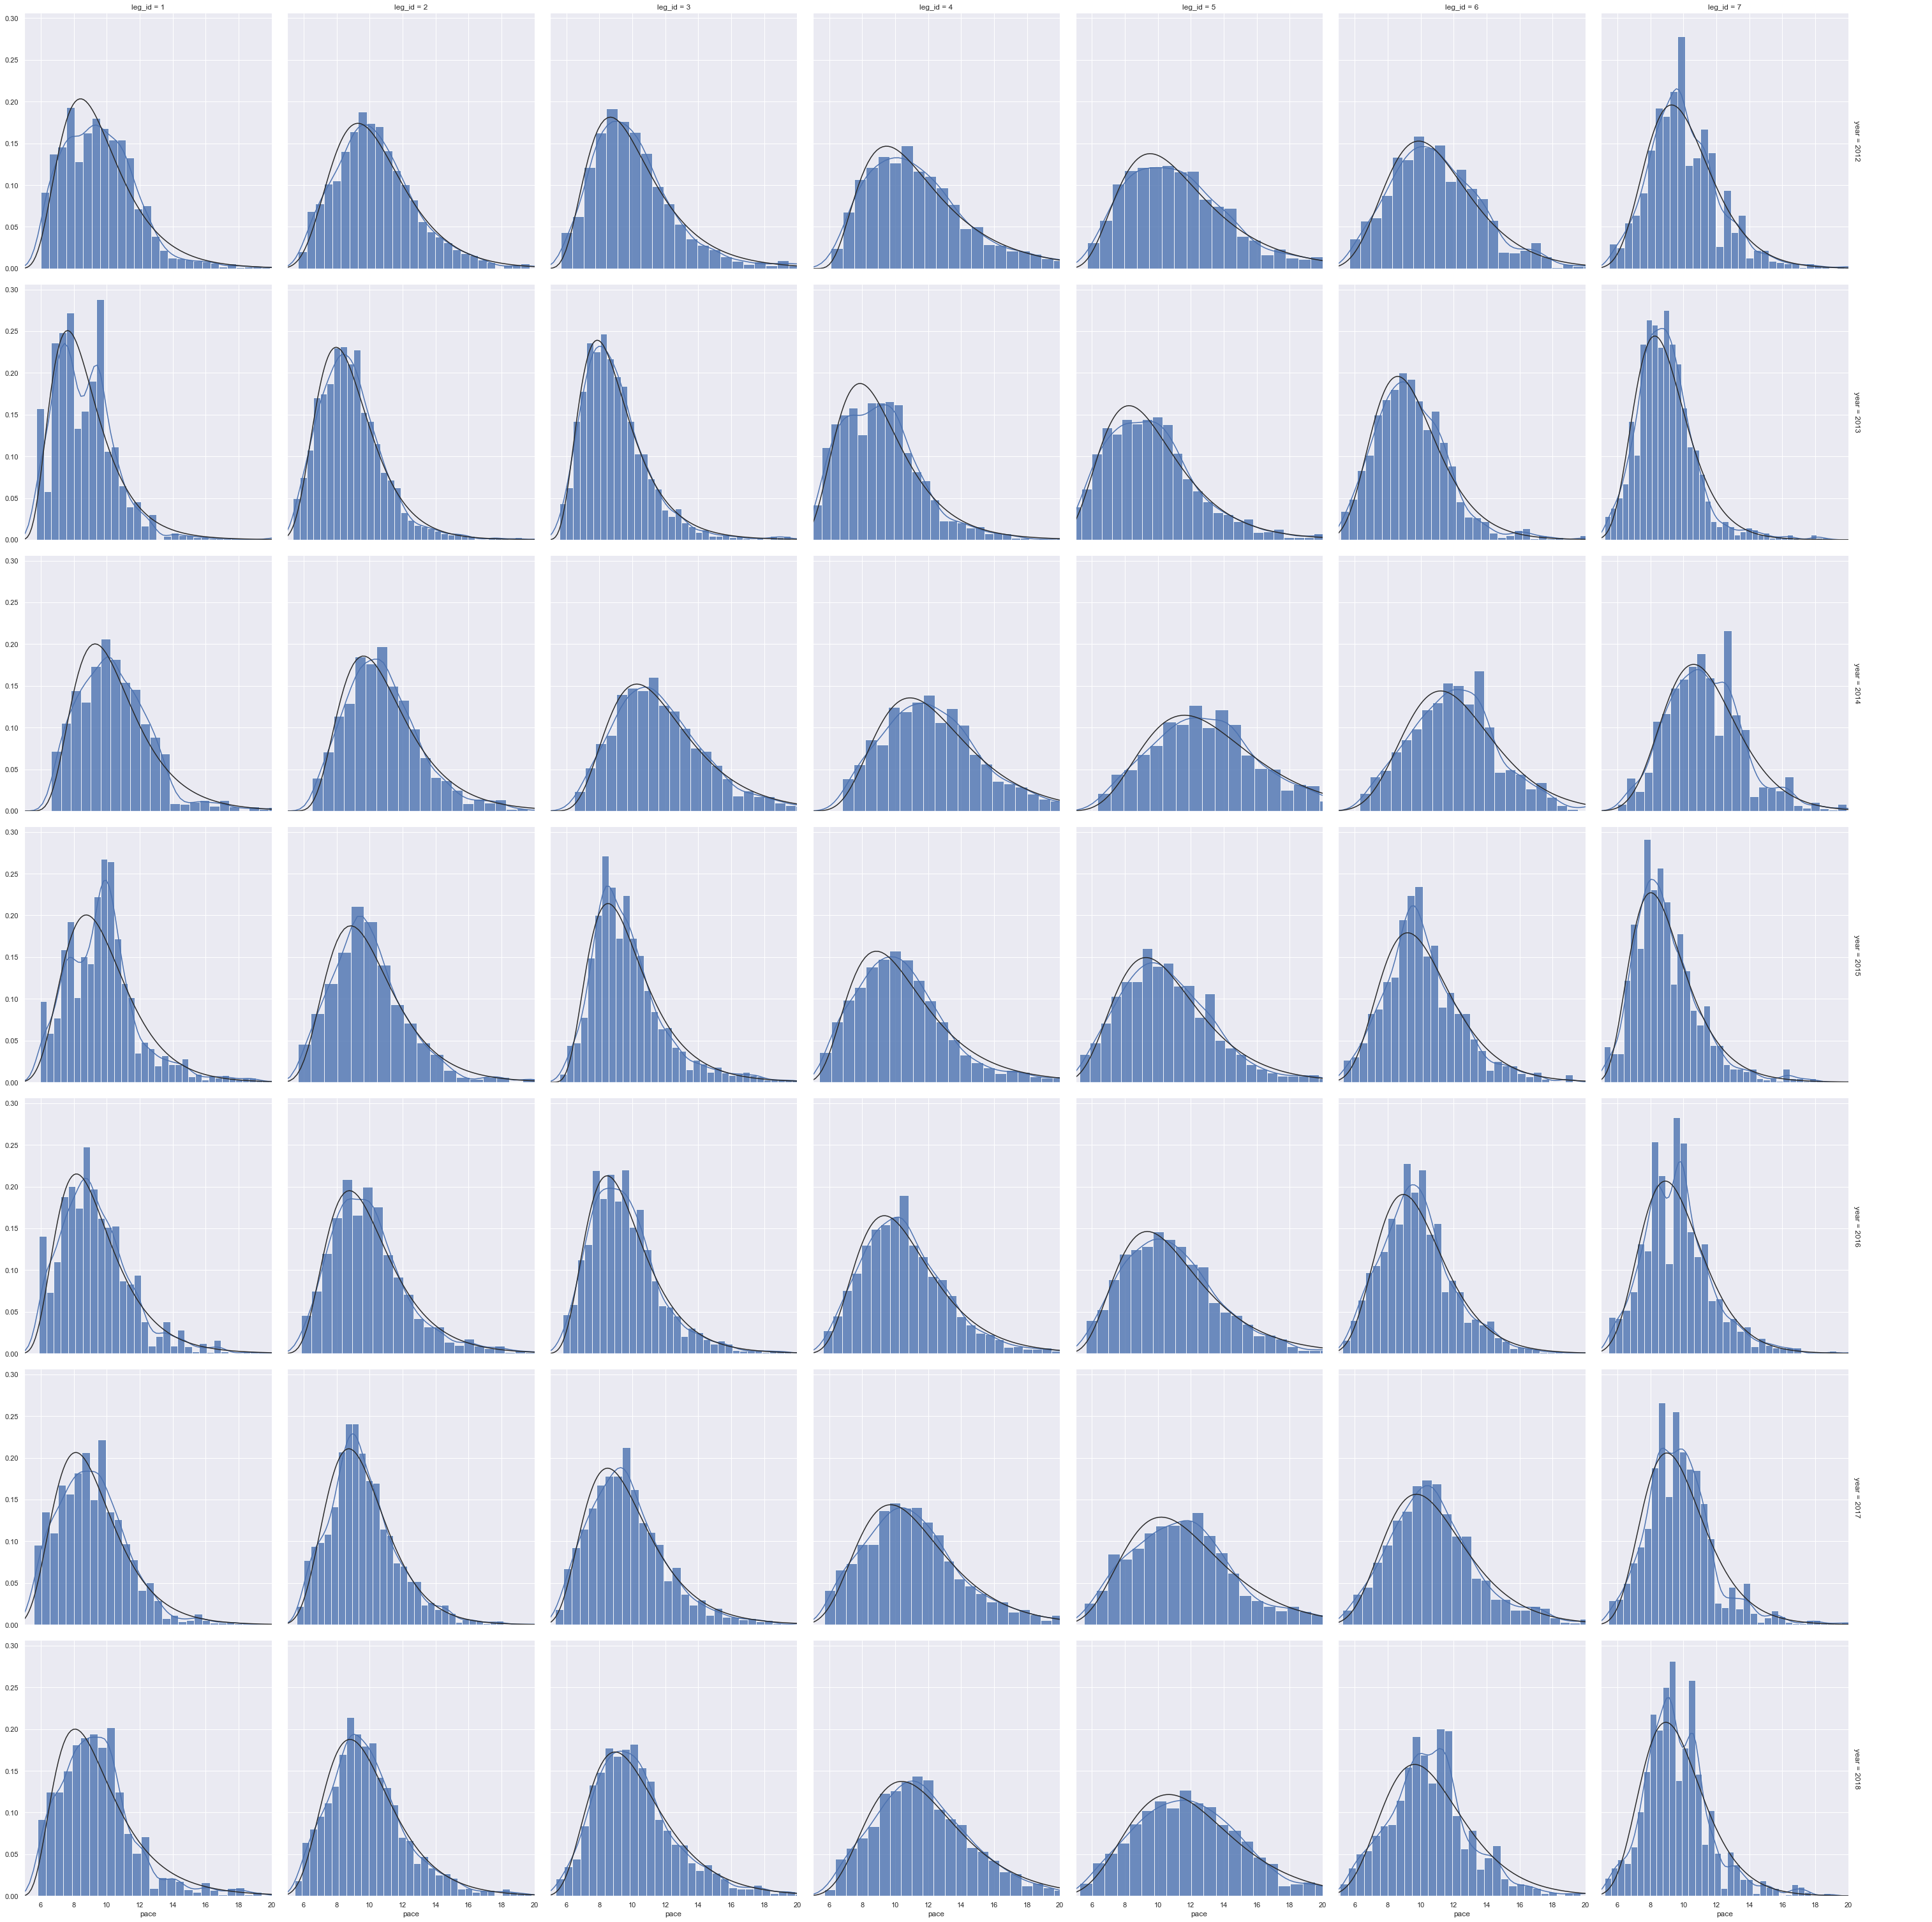

In [10]:
g = sns.FacetGrid(runs, row="year", col="leg_id", height=6, xlim=(5,20), margin_titles=True, despine=True)
g.map(sns.distplot, "pace", hist_kws={'alpha':0.8}, fit=lognorm).add_legend()

In [11]:
runs.sort_values(by="pace")

name  year  team_id  \
2300                                 tue lassen  2013        7   
63628                               mats haldin  2013        3   
101                              bartosz pawlak  2013        5   
1934                                olle kärner  2013        4   
57750                             jerker lysell  2013       23   
558                              martin hubmann  2013       24   
1869                          petteri muukkonen  2013        6   
3511                            wojciech dwojak  2013       11   
1215                               olle boström  2013       15   
180                               jan prochazka  2013        1   
57849                              pekka itävuo  2013       37   
49340                           donatas stulgys  2013       20   
58217                            antti nurmonen  2013       10   
58003                        jonathan rosendahl  2013       59   
327                                mikko patana  2013        4   
57882                             ivo kamenarov  2013       33   
71955                          mathias karlsson  2013        3   
71957                            sauter philipp  2013       19   
2173                               tuomas tervo  2013       12   
288    thomas carlsson:MALUNGS OK SKOGSMÅRDARNA  2013        2   
71968                            erik sagvollen  2013       22   
74447                             tobias noborn  2013        9   
270                                 emil svensk  2018       54   
2059                             david lingfors  2013       18   
692                             nicolas simonin  2013       40   
1388                        aleksei alekseyonok  2013       41   
1451                            henrikas pauzas  2013       32   
160                               ivar lundanes  2013       27   
2420                                peter öberg  2013       30   
452                           rassmus andersson  2013       18   
...                                         ...   ...      ...   
45558                             pekka heikelä  2014     1379   
44173                             risto kuronen  2018      889   
56985                              tomi taavila  2016     1299   
71091                             jukka eskanen  2014      930   
46475                            joni pakarinen  2018     1349   
45565                          pentti laaksonen  2012     1227   
44914                              herman wjuga  2017     1339   
45098                              vesa peltola  2018     1845   
62710                            tommi vienonen  2014     1360   
68292                                ari vesola  2014     1532   
76282                            oiva vaaranmaa  2012     1575   
8325              eero lehtonen:STADIN KUMMELIT  2018     1341   
76311                          pertti syvälahti  2012     1290   
76339                             merja kaskela  2012     1582   
43794                                merja rasi  2014     1366   
44731                      ari hyvönen:OC TUSKA  2018     1255   
45099                              vesa peltola  2016     1231   
71329                               juha tontti  2014     1572   
71453                                riku kokko  2012     1632   
62547                         lasse vainikainen  2014     1516   
62756                            julian morgone  2016     1392   
68488                             arvo majoinen  2014     1501   
71378                           olavi markkanen  2014     1368   
44527                              heimo heiska  2018     1295   
67513                          vilho virolainen  2014     1482   
44530                              heimo heiska  2014     1383   
71436                            ville tolvanen  2012     1546   
50000                       torkil eide solstad  2015     1786   
67730                          pasi tiirikainen  2014     1226   
44529            

In [83]:
runs["first_name"] = runs.name.str.split(" ", expand=True).iloc[:,0]
runs["first_name"].describe()
counts = runs["first_name"].value_counts()
top_counts = counts[counts > 20]

runs["top_first_name"] = runs["first_name"]

def top_name(first_name): 
    if first_name in top_counts:
        return first_name
    else:
        return  "NA"
    
runs["top_first_name"] = runs.apply(lambda run: top_name(run["first_name"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()
top_counts.describe()

count     452.000000
mean      143.420354
std       236.130062
min        21.000000
25%        31.000000
50%        54.000000
75%       131.000000
max      1787.000000
Name: first_name, dtype: float64

(4, 20)

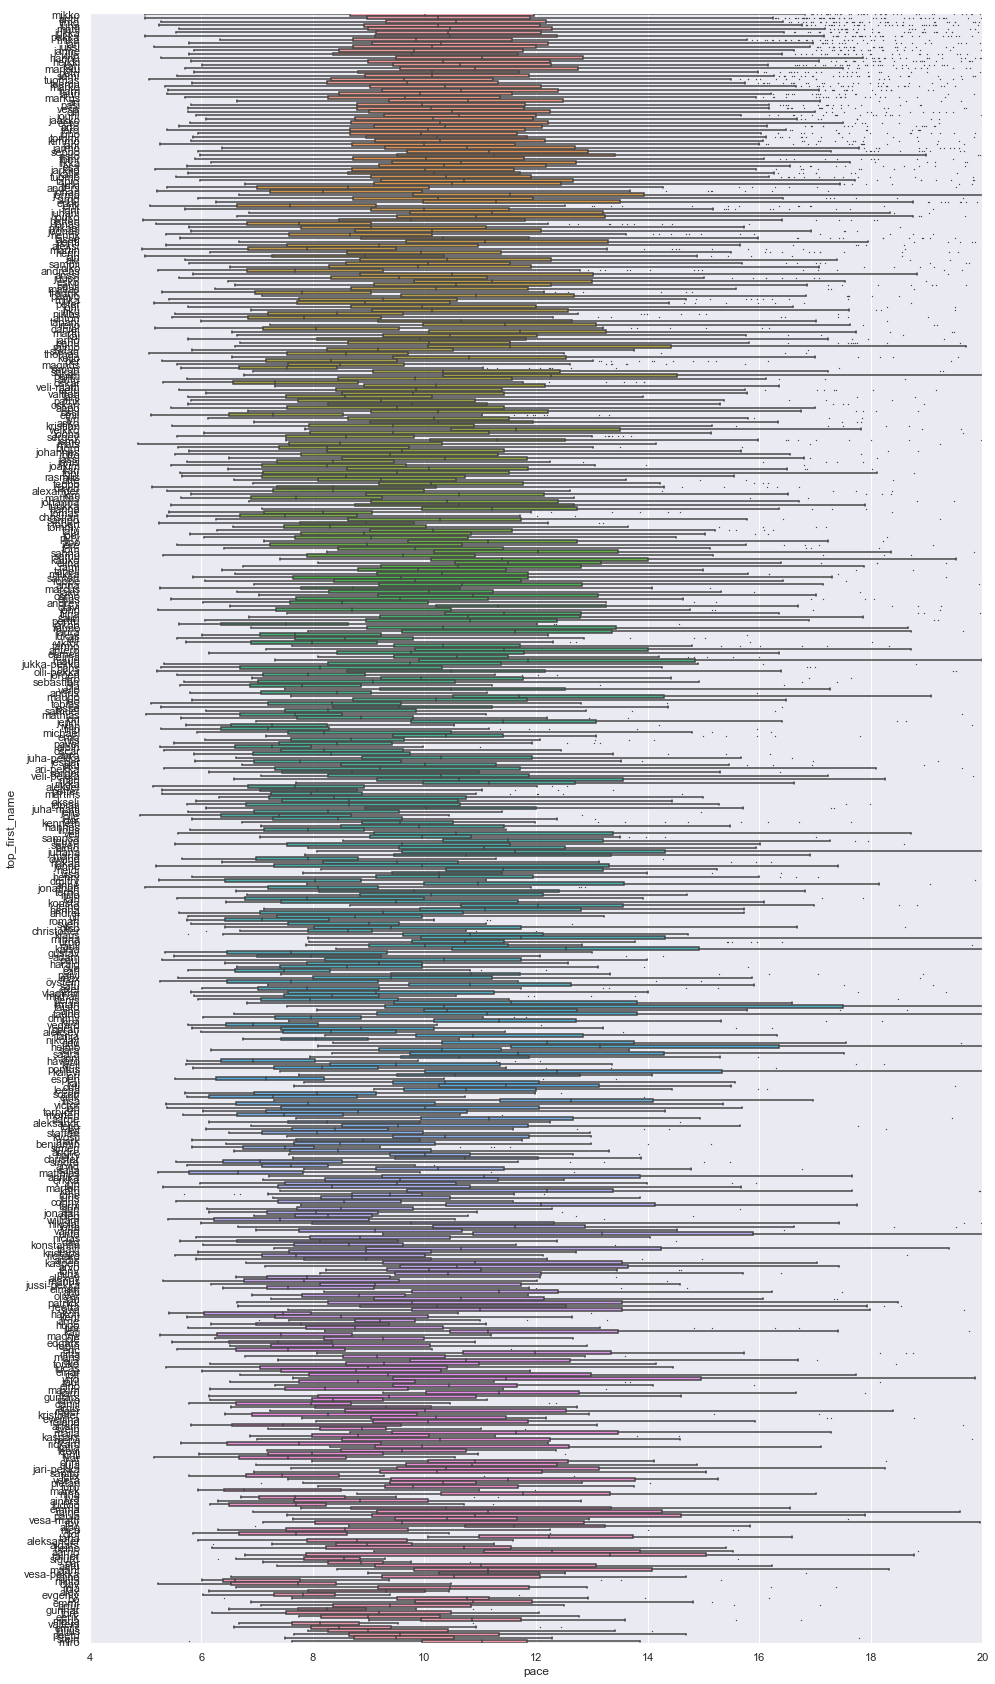

In [53]:
#g = sns.FacetGrid(runs, hue="top_first_name", height=8, aspect=2, xlim=(5,20), margin_titles=True) # no facet here
#g.map(sns.distplot, "pace", hist=False).add_legend()
plt.figure(figsize=(16, 30))
ax_names = sns.boxplot(y="top_first_name", x="pace", data=runs, fliersize=0.5, order=top_counts.index.tolist())
ax_names.set_xlim(4, 20)

In [101]:
runs
runs = runs.assign(team_id_log=np.log(runs.team_id))
runs = runs.assign(team_id_square=np.square(runs.team_id))

runs = runs.assign(team_id_square=np.square(runs.team_id))

first_names = pd.get_dummies(runs[["top_first_name", "leg_id"]])
first_names[["team_id_log", "team_id_square"]] = runs[["team_id_log", "team_id_square"]]
first_names.insert(0, "team_id", runs["team_id"])

import json
with open(f"data/unknown_runners_feature_columns.json", 'w') as outfile:
    json.dump(first_names.columns.tolist(), outfile)

x = first_names.values
y = runs.pace.values

y = y.reshape(len(y), 1)

In [55]:
x.shape

(76545, 463)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2019)

In [57]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)

(51285, 463)

(51285, 1)

(25260, 463)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
#first_names.columns.shape
#regr.coef_[0].shape
coefs = pd.DataFrame({'feature':first_names.columns, 'coef':regr.coef_[0]})
coefs['feature'] = coefs['feature'].str.replace('top_first_name_','')
display(coefs.sort_values(by="coef").head(20))
display(coefs.sort_values(by="coef", ascending=False).head(20))

feature      coef
428        ulf -1.594473
326        pär -1.471100
275     nikita -1.355404
72      edgars -1.246022
269     morten -1.218288
120       hugo -1.185498
15      akseli -1.179026
225      linus -1.166489
287     oliver -1.156764
59        carl -1.151248
74       eerik -1.127137
288       olle -1.124045
10      aigars -1.122676
450    william -1.106639
29       andre -1.076058
251   matthias -1.047229
71      dmitry -1.030797
382     sindre -1.000386
158    jonatan -0.991017
61   christian -0.987161

feature      coef
114    heimo  4.431804
429     unto  2.788410
391   taisto  2.368630
451     yrjö  2.174593
52      arvo  1.920101
314   pentti  1.845592
255    mauri  1.744263
306  patrick  1.622140
5      aarno  1.528997
86      emma  1.476225
254    mauno  1.466532
171   juhana  1.431369
165    jorma  1.376646
267    minna  1.352134
327    raimo  1.337017
112    heidi  1.276754
198    kauko  1.274701
340    reino  1.264142
188   kalevi  1.243100
386     suvi  1.231596

In [59]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_pred))
y_pred

# Simple linear: Mean squared error: 6.44 Explained variance score: 0.30
# log + square = Mean squared error: 6.21 Explained variance score: 0.320
# 100 first names + leg_id = Mean squared error: 7.842 Explained variance score: 0.101
# 452 first names + leg_id + log + square = Mean squared error: 5.387 Explained variance score: 0.382

Mean squared error: 5.387
Explained variance score: 0.382


array([[ 7.26514025],
       [10.14759288],
       [10.9960141 ],
       ...,
       [ 9.36047163],
       [11.68879681],
       [10.78166863]])

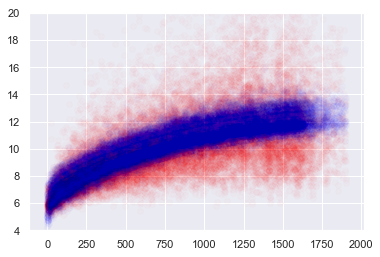

In [60]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
plt.ylim(4, 20)
plt.show()

In [114]:
%%time
rf = RandomForestRegressor(n_estimators=500, random_state=0, verbose=1, n_jobs=-1,
                          max_depth= 31, 
                           max_features="auto", 
                           max_leaf_nodes= 187, 
                           min_impurity_decrease= 0.00026892804687183225, 
                           min_samples_leaf= 0.0027584156528699683, 
                           min_samples_split= 21, 
                           min_weight_fraction_leaf= 0.00837)
rf.fit(x_train, y_train.ravel())
# Make predictions using the testing set
rf_y_pred = rf.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print("Explained variance score: %.3f" % r2_score(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s


Mean squared error: 5.391
Explained variance score: 0.382
CPU times: user 45min 18s, sys: 1min 9s, total: 46min 28s
Wall time: 4min 39s


[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished


In [142]:
%%time
import sklearn
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=1100,
                                                 criterion='friedman_mse', 
             learning_rate=0.10927990420965396, loss='ls', max_depth=1,
             max_features='auto', max_leaf_nodes=156,
             min_impurity_decrease=0.0, 
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, 
             random_state=0,
             subsample=0.8209381840043655, 
             verbose=1)
#gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3100, random_state=0, verbose=1,  max_features="log2")

gbr.fit(x_train, y_train.ravel())
y_gbr_pred = gbr.predict(x_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_gbr_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_gbr_pred))



      Iter       Train Loss      OOB Improve   Remaining Time 
         1           8.3206           0.5515           30.71m
         2           7.9442           0.4340           30.83m
         3           7.5280           0.3618           31.01m
         4           7.2266           0.3051           30.77m
         5           7.0108           0.2355           30.79m
         6           6.8072           0.1916           30.66m
         7           6.7072           0.1622           30.71m
         8           6.4272           0.1285           30.57m
         9           6.3497           0.1152           30.64m
        10           6.2585           0.1023           30.67m
        20           5.7710           0.0249           30.26m
        30           5.6549           0.0119           29.93m
        40           5.6431           0.0029           29.58m
        50           5.5363           0.0004           29.16m
        60           5.5154           0.0017           28.86m
       

In [152]:
#print(f"feature_importances_: {gbr.feature_importances_}")
gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance':gbr.feature_importances_})
gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
gbr_features.sort_values(by="importance", ascending=False)

feature  importance
0           team_id    0.341433
462  team_id_square    0.247452
461     team_id_log    0.142351
458        leg_id_5    0.061457
457        leg_id_4    0.035108
454        leg_id_1    0.016998
459        leg_id_6    0.010248
460        leg_id_7    0.009391
114           heimo    0.008243
455        leg_id_2    0.004920
456        leg_id_3    0.003746
314          pentti    0.003359
86             emma    0.003348
2                NA    0.002995
52             arvo    0.002826
165           jorma    0.001888
346           risto    0.001880
284           olavi    0.001735
164            jori    0.001637
440            vesa    0.001592
91            erkki    0.001500
391          taisto    0.001471
408           tiina    0.001453
254           mauno    0.001440
166           jouko    0.001407
267           minna    0.001387
255           mauri    0.001347
107           hannu    0.001281
196           katja    0.001229
216           lasse    0.001227
..              ...         ...
64              dag    0.000000
155            john    0.000000
207           klaus    0.000000
435           veijo    0.000000
109          harald    0.000000
273           niilo    0.000000
270          mårten    0.000000
339           reima    0.000000
341         richard    0.000000
352           roman    0.000000
355            rune    0.000000
249          matias    0.000000
240           marja    0.000000
238           maris    0.000000
292            onni    0.000000
78            einar    0.000000
227           lucas    0.000000
170      juha-pekka    0.000000
221           leevi    0.000000
214            lari    0.000000
208          konsta    0.000000
92             erno    0.000000
201            kent    0.000000
322         pietari    0.000000
124            igor    0.000000
426            turo    0.000000
318           peter    0.000000
90            erkka    0.000000
430            urpo    0.000000
387           svein    0.000000

[463 rows x 2 columns]

In [104]:
from time import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.stats import norm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")




In [140]:
%%time
#specify parameters and distributions to sample from
crf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, 
                                                 random_state=0, 
                                                 verbose=1, 
                                                 n_iter_no_change=100, tol=0.000001)

param_dist_gbr = { 
    "max_leaf_nodes": np.rint(np.abs(norm.rvs(loc=156, scale=10, size=1000))).astype("int"), 
    "max_depth": np.rint(np.abs(norm.rvs(loc=1, scale=1, size=1000))).astype("int"), 
    "max_features": ["auto", "sqrt"], 
    "learning_rate": np.abs(norm.rvs(loc=0.11, scale=0.01, size=1000)), 
    "subsample": np.abs(norm.rvs(loc=0.83, scale=0.1, size=1000)) }

n_iter_search = 5 
random_search = RandomizedSearchCV(crf, param_distributions=param_dist_gbr, random_state=2019, 
                                   n_iter=n_iter_search, cv=3, n_jobs=-1, error_score=0, verbose=1)

start = time() 
random_search.fit(x_train, y_train.ravel()) 
print("RandomizedSearchCV took %.2f seconds for %d candidates" " parameter settings." % ((time() - start), n_iter_search)) 
report(random_search.cv_results_) 
print(random_search.best_estimator_)



Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 232.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 338.1min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           8.3893           0.5322           27.32m
         2           7.9025           0.4413           27.25m
         3           7.5844           0.3484           27.12m
         4           7.3088           0.2858           26.90m
         5           7.1039           0.2355           27.01m
         6           6.8377           0.1853           26.87m
         7           6.6860           0.1528           26.73m
         8           6.5420           0.1354           26.78m
         9           6.3376           0.1150           26.79m
        10           6.3323           0.0898           26.70m
        20           5.7487           0.0242           26.52m
        30           5.7182           0.0111           25.96m
        40           5.6346           0.0029           25.64m
        50           5.5404           0.0018           25.33m
        60           5.5006           0.0015           24.89m
       

In [141]:
crf_y_pred = random_search.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, crf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, crf_y_pred))
r2 = r2_score(y_test, crf_y_pred)

with open(f"data/rf-best_estimator_{r2:.3f}.json", 'w') as outfile:
    outfile.write(str(random_search.best_estimator_.get_params()))

Mean squared error: 5.197
Explained variance score: 0.404


In [71]:
# plot it as in the example at http://scikit-learn.org/
#plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
#plt.scatter(x_test[:,0], rf_y_pred, color='blue', alpha=0.01)
#plt.ylim(4, 20)
#plt.show()

In [72]:
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#y_rbf_pred = svr_rbf.fit(x_train, y_train.ravel()).predict(x_test)
#print("Mean squared error: %.3f"
#      % mean_squared_error(y_test, y_rbf_pred))
# Explained variance score: 1 is perfect prediction
#print('Explained variance score: %.3f' % r2_score(y_test, y_rbf_pred))


In [73]:
br = linear_model.BayesianRidge()
br.fit(x_train, y_train.ravel())
y_br_pred = br.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_br_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_br_pred))




Mean squared error: 5.379
Explained variance score: 0.383


In [76]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train.ravel())
y_ransac_pred = ransac.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_ransac_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_ransac_pred))


Mean squared error: 8235713037.945
Explained variance score: -944256375.122
